# Fire up ~graphlab~ Pandas create

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load some house sales data

In [5]:
sales = pd.read_csv("home_data.csv")

In [7]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploring the data for housing sales

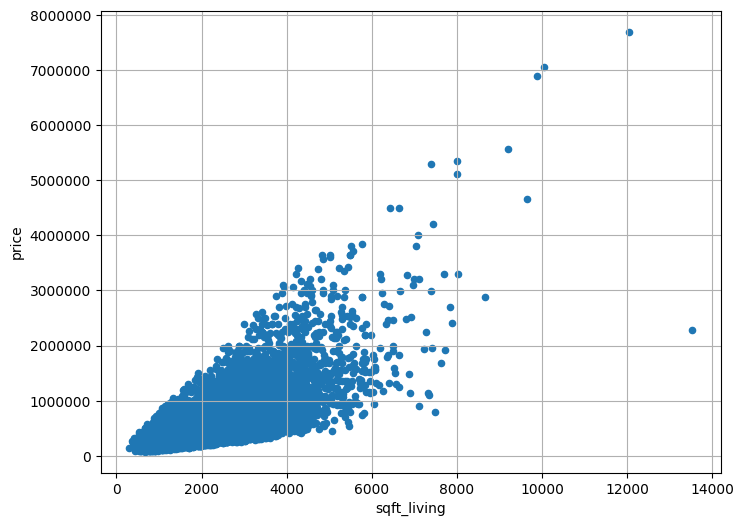

In [42]:
sales.plot(kind='scatter', x='sqft_living', y='price', figsize=(8, 6))
# Prevent numbers being changed to exponential form
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

* As we can see, there is a straight correlation between `sqft_living` and `price` of the houses.

# Create a simple regrsion model of sqft_living to price

In [181]:
feature_cols = ['sqft_living']
# store the feature matrix in "X"
X = sales[feature_cols]
# store the responses in "y"
y = sales.price

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Build the regression model

In [183]:
# import your model from sklearn library
from sklearn.linear_model import LinearRegression

# instantiate your desired model
lingreg = LinearRegression()

# fit the mode with data
lingreg.fit(X_train, y_train)

LinearRegression()

## Evaluate the simple model

In [184]:
print(f"Average price: {sales.price.mean():,}")

Average price: 540,088.1417665294


In [185]:
from sklearn.metrics import mean_squared_error

# predict the X_test responses
y_pred = lingreg.predict(X_test)

# calculate max error
max_error = np.max(np.abs(y_pred - y_test))

# Calculate the Mean Square Error metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Max Error: {max_error:,}, RMSE: {rmse:,}")

Max Error: 4,430,633.537044522, RMSE: 292,797.8385783693


* **Max Error**: it predicted one house's price $4,430,633 more/less than it was.
* Recall, **RMSE**, the lower the better.

# Let's show what our predictions look like

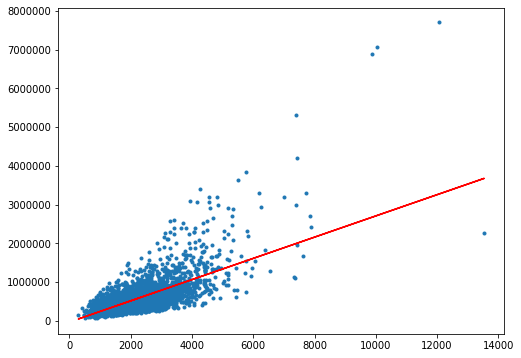

In [113]:
plt.figure(figsize=(8, 6))

plt.plot(X_test, y_test, marker='.', linestyle='')
plt.plot(X_test, y_pred, marker='', linestyle='-', color='red')

# Prevent numbers being changed to exponential form
plt.ticklabel_format(style='plain', axis='y')

plt.show()

* Let's see both **coefficient** and **intercept** for this model:

In [122]:
pd.DataFrame([lingreg.intercept_, lingreg.coef_[0]], index=['Intercept', 'Coefficient'])

,0
Intercept,-30186.361061
Coefficient,273.821811


# Explore other features in the data

In [126]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [131]:
sales[feature_cols]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650.0,1.0,98178
1,3,2.25,2570,7242.0,2.0,98125
2,2,1.00,770,10000.0,1.0,98028
3,4,3.00,1960,5000.0,1.0,98136
4,3,2.00,1680,8080.0,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131.0,3.0,98103
21609,4,2.50,2310,5813.0,2.0,98146
21610,2,0.75,1020,1350.0,2.0,98144
21611,3,2.50,1600,2388.0,2.0,98027


In [138]:
sales[feature_cols].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651360e+06,3.500000,98199.000000


<AxesSubplot:>

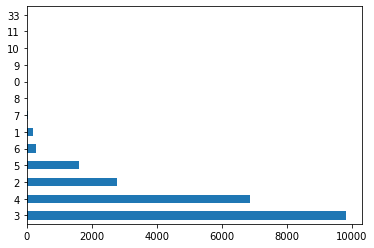

In [146]:
sales.bedrooms.value_counts().plot(kind='barh')

# Build a regression model with more features

In [176]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [177]:
X = sales[my_features]
y = sales.price

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [179]:
my_features_model = LinearRegression()

my_features_model.fit(X_train, y_train)

LinearRegression()

## Evaluate the second model

In [180]:
from sklearn.metrics import mean_squared_error

# predict the X_test responses
y_pred = my_features_model.predict(X_test)

# calculate max error
max_error = np.max(np.abs(y_pred - y_test))

# Calculate the Mean Square Error metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Max Error: 4,430,633.537044522, RMSE: 292,797.8385783693")
print(f"Max Error: {max_error:,}, RMSE: {rmse:,}")

Max Error: 4,430,633.537044522, RMSE: 292,797.8385783693
Max Error: 2,857,685.1643021554, RMSE: 257,288.2498280363


# Apply learned models to predict prices of 3 houses

In [203]:
house1 = sales[sales.id == 5309101200]

In [204]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000.0,4,2.25,2400,5350.0,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


![](./house_images/house1.png)

In [224]:
print(f"Actual Price: {house1.price.item():,}")

Actual Price: 620,000.0


In [235]:
first_prediction = lingreg.predict(house1[feature_cols])[0]
print(f"First model prediction: {first_prediction:,}")

First model prediction: 626,985.9856310346


In [237]:
second_prediction = my_features_model.predict(house1[my_features])[0]
print(f"Seond model prediction: {second_prediction:,}")

Seond model prediction: 632,338.7222071514


# Prediction for a second, fancier house

In [238]:
house2 = sales[sales.id == 1925069082]

In [239]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703.0,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


![](./house_images/house2.jpg)

* Nice house, by the way!

In [241]:
print(f"Actual Price: {house2.price.item():,}")

Actual Price: 2,200,000.0


In [242]:
first_prediction = lingreg.predict(house2[feature_cols])[0]
print(f"First model prediction: {first_prediction:,}")

First model prediction: 1,240,346.8425436513


In [243]:
second_prediction = my_features_model.predict(house2[my_features])[0]
print(f"Seond model prediction: {second_prediction:,}")

Seond model prediction: 1,264,185.8079581335


## Last house, super fancy

* **Bill Gates**' house

![](./house_images/bill_gates.png)

In [253]:
house3 = [[50_000]]
first_prediction = lingreg.predict(house3)[0]
print(f"First model prediction: {first_prediction:,}")

First model prediction: 13,660,904.195024142


In [254]:
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [255]:
house3 = [[8, 25, 50_000, 225_000, 4, 98039]]
second_prediction = my_features_model.predict(house3)[0]
print(f"Seond model prediction: {second_prediction:,}")

Seond model prediction: 15,603,684.238929197
